In [1]:
import numpy as np
import shapely
import bisect
import shapely.wkt
import matplotlib.pyplot as plt
import math
import geopandas as gpd
import json
import pandas as pd
import seaborn as sns
from enum import Enum


from bench_utils import parse_intersection_data 


In [2]:
# Geometries
manual_data, _ = parse_intersection_data("manual")
special_cases, _ = parse_intersection_data("latest_export.json", strip_precision=True)
world_data, world_data_stats = parse_intersection_data("world.json", 100, strip_precision=True)
lund_data, lund_data_stats = parse_intersection_data("lund.json", 1000)
sweden_data, sweden_data_stats = parse_intersection_data("sweden-places-a.json")
new_york_data, new_york_data_stats = parse_intersection_data("new-york-natural.json")
waterways_data, waterways_data_stats = parse_intersection_data("nord-est-waterways.json")


In [3]:
SHOW_COORDINATES = True
SHOW_GEOMETRIES = True
SHOW_INTERSECTING_POINTS = True
SHOW_COMMON_BOUNDING_BOX = False
SHOW_BOUNDING_BOXES = False
SHOW_STATS = False

LARGE_THRESHOLD = 50

In [4]:
import intersection.first_bin_search
import intersection.chunk_bbox_intersection
binary_intersection = intersection.first_bin_search.binary_intersection
chunk_bbox_is_intersecting = intersection.chunk_bbox_intersection.is_intersecting
chunk_bbox_intersection = intersection.chunk_bbox_intersection.intersection

from intersection.plotting import *
import algos.fpd_extended_lib.cfg as cfg
from algos.alg_fpd_extended import FpdExtended

fpd = FpdExtended()

In [5]:
def set_max_num_delta(val):
        cfg.MAX_NUM_DELTAS = val
        cfg.D_CNT_SIZE = cfg.required_bits(val)

Passed 100 of 100. Total in set: 3522
Passed 200 of 200. Total in set: 3522
Passed 300 of 300. Total in set: 3522
Passed 400 of 400. Total in set: 3522
Passed 500 of 500. Total in set: 3522
Passed 600 of 600. Total in set: 3522
Passed 700 of 700. Total in set: 3522
Passed 800 of 800. Total in set: 3522
Passed 900 of 900. Total in set: 3522
Passed 1000 of 1000. Total in set: 3522
Passed 1100 of 1100. Total in set: 3522
Passed 1200 of 1200. Total in set: 3522
Passed 1300 of 1300. Total in set: 3522
Passed 1400 of 1400. Total in set: 3522
Passed 1500 of 1500. Total in set: 3522
Passed 1600 of 1600. Total in set: 3522
Passed 1700 of 1700. Total in set: 3522
Passed 1800 of 1800. Total in set: 3522
Passed 1900 of 1900. Total in set: 3522
Passed 2000 of 2000. Total in set: 3522
Passed 2100 of 2100. Total in set: 3522
Passed 2200 of 2200. Total in set: 3522
Passed 2300 of 2300. Total in set: 3522
Passed 2400 of 2400. Total in set: 3522
Passed 2500 of 2500. Total in set: 3522
Passed 2600 of 260

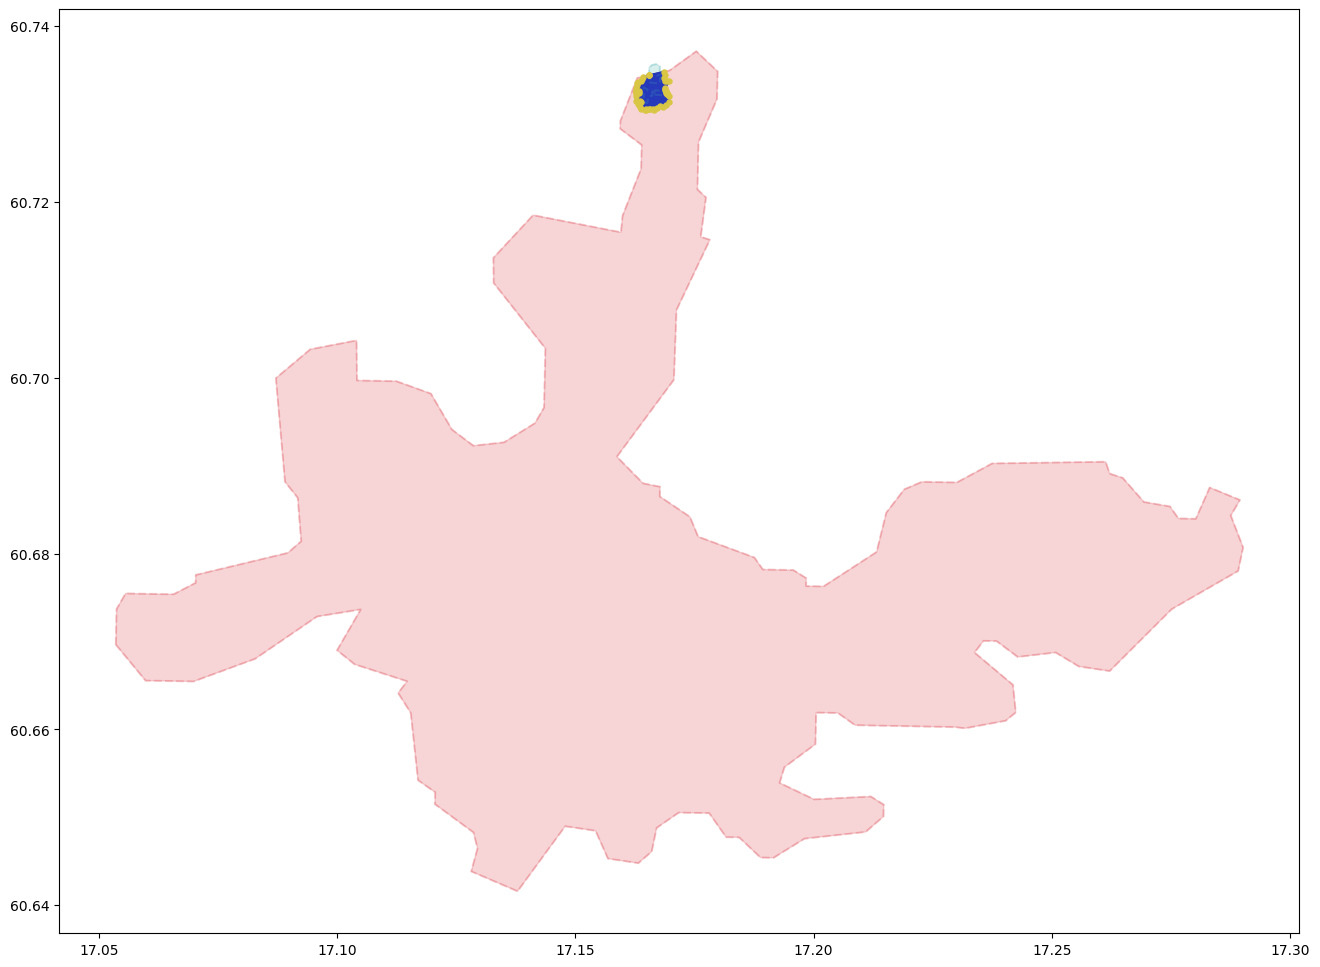

Passed 4499 of 4500. Total in set: 1818
Passed 4599 of 4600. Total in set: 1818
Above FAILED!
Expected shape: POLYGON ((18.326692 59.3242088, 18.3275557 59.3247995, 18.3274108 59.3248803, 18.327207 59.3249637, 18.3269495 59.3249966, 18.3267242 59.3250472, 18.3265847 59.3251129, 18.3265418 59.325273, 18.3266652 59.3253838, 18.3279204 59.326109, 18.328591 59.3259353, 18.3294225 59.325949, 18.3306713 59.3267189, 18.3307181 59.3267484, 18.3330435 59.3282152, 18.3275932 59.3318053, 18.3397485 59.329298, 18.3412832 59.3289814, 18.3443768 59.3296464, 18.3467027 59.3301464, 18.3486317 59.3305638, 18.3487954 59.3315152, 18.3488103 59.3316036, 18.3490071 59.331669, 18.3494927 59.3318373, 18.34996 59.3319827, 18.3625183 59.3355805, 18.3685321 59.3366384, 18.3739712 59.3383016, 18.3719621 59.3391269, 18.3684877 59.3406008, 18.3639577 59.3426116, 18.3668583 59.3438133, 18.3789672 59.3435715, 18.3865556 59.3427425, 18.400415 59.3393885, 18.398261 59.3355006, 18.4025099 59.3348353, 18.4058374 59.3338

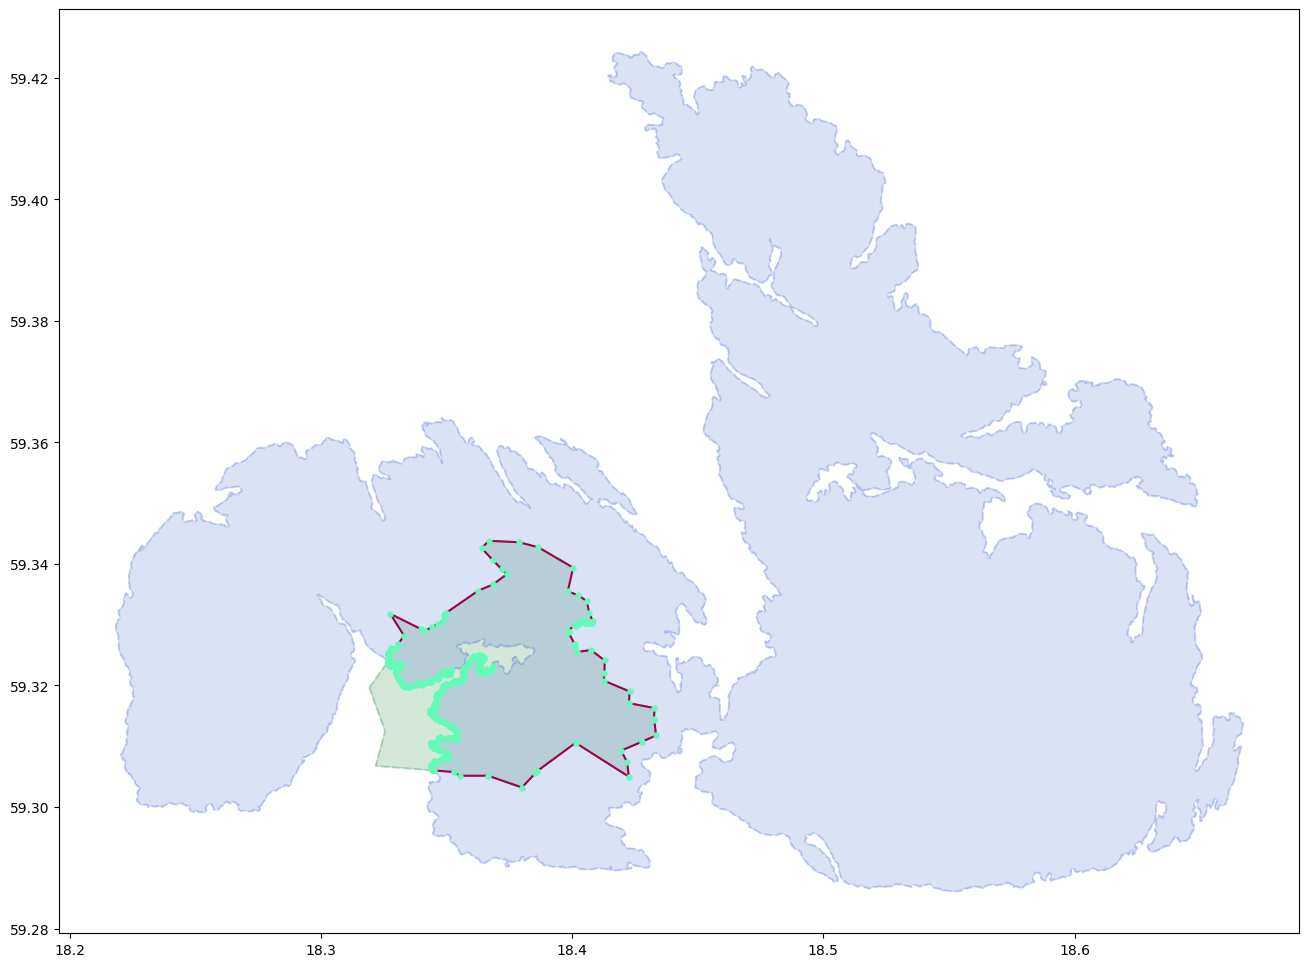

Above FAILED!
Expected shape: MULTIPOLYGON (((18.3934429 59.2675448, 18.3936587 59.2677924, 18.3939913 59.267765, 18.3944956 59.2678253, 18.3949784 59.2679788, 18.3955899 59.2682694, 18.3955792 59.2684229, 18.3976792 59.2682219, 18.39828 59.2679477, 18.401048 59.269587, 18.401316 59.269494, 18.4015843 59.2693186, 18.4017462 59.2691261, 18.4018982 59.2689006, 18.402238 59.26835, 18.4040378 59.2685502, 18.406493 59.267213, 18.4068001 59.267511, 18.4071541 59.2676371, 18.407464 59.2677503, 18.4079146 59.2676543, 18.408317 59.2672733, 18.4085154 59.2667798, 18.4092128 59.2663275, 18.409937 59.2658806, 18.4103876 59.2658203, 18.4108597 59.2658669, 18.411573 59.2664783, 18.4117704 59.2675376, 18.4099692 59.2681944, 18.4096247 59.2686862, 18.4104949 59.269269, 18.4103323 59.2693496, 18.4100002 59.2695141, 18.4107041 59.2697596, 18.4121408 59.2695653, 18.4128811 59.2692117, 18.4142973 59.2689047, 18.4155953 59.2684293, 18.4161928 59.268099, 18.418024 59.2690023, 18.4197689 59.2695394, 18.41950

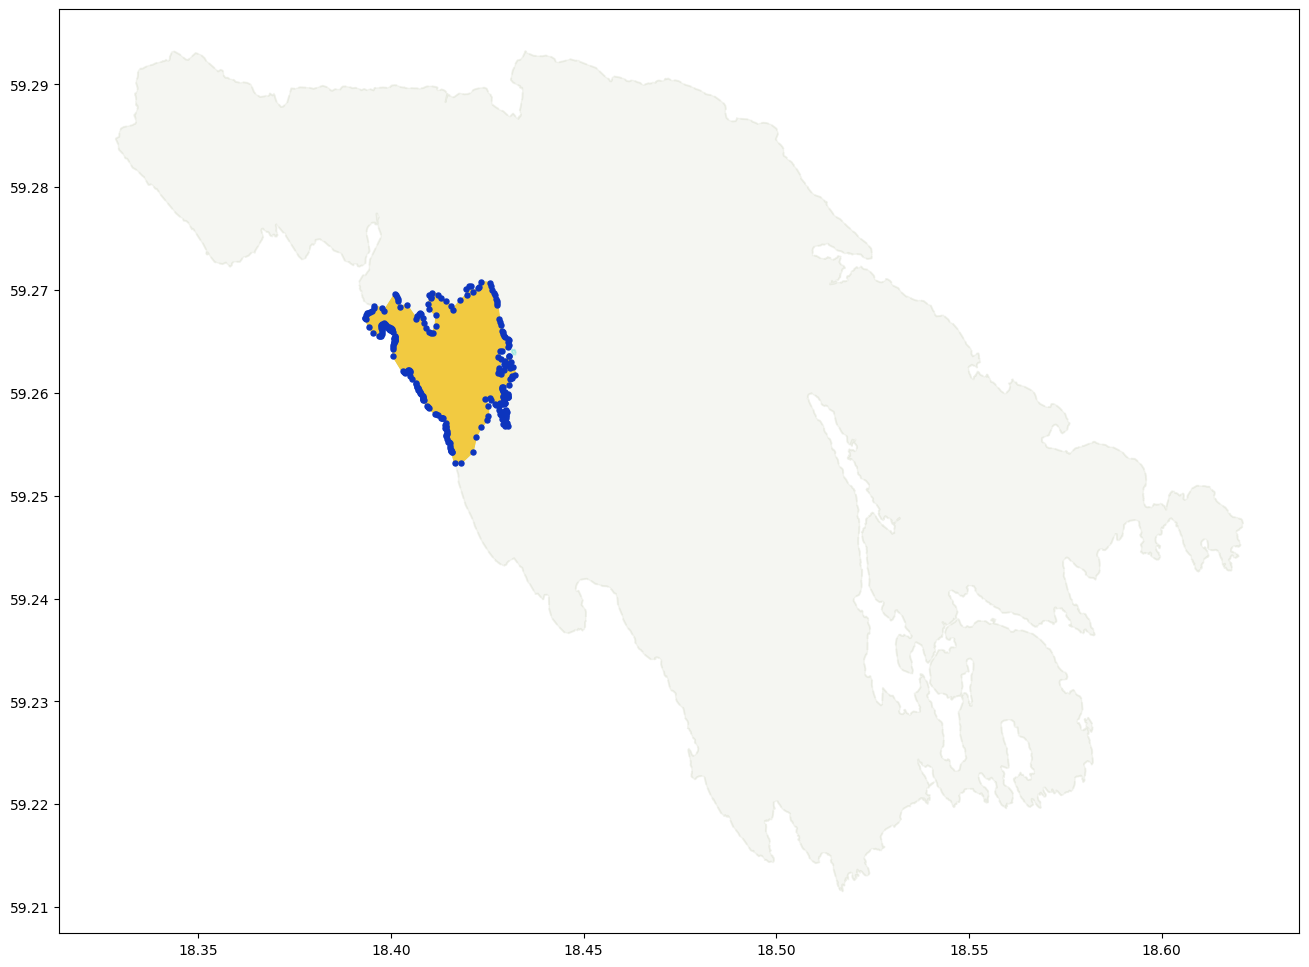

Above FAILED!
Expected shape: POLYGON ((17.16547493699315 60.734393018340946, 17.1654864 60.7343885, 17.165491285723398 60.73439506359116, 17.168574545926386 60.73478078397964, 17.168748 60.734399, 17.1686256 60.734058, 17.1687015 60.7337169, 17.1691642 60.7337143, 17.1696514 60.7337387, 17.1688786 60.7329985, 17.1688623 60.7328693, 17.1688725 60.732763, 17.1689497 60.7326537, 17.1690941 60.7324748, 17.1691307 60.7324102, 17.1691185 60.7323665, 17.1691246 60.7323237, 17.1692282 60.732283, 17.1693238 60.732289, 17.1696492 60.7320544, 17.1695741 60.731341, 17.1690591 60.7310316, 17.1683618 60.7308375, 17.167718 60.7308637, 17.1670421 60.7306801, 17.1664735 60.7304598, 17.1663662 60.7305228, 17.1657547 60.7305123, 17.1655401 60.7306067, 17.1648642 60.73057, 17.1648212 60.7304651, 17.1645423 60.7304546, 17.1638262 60.730584, 17.1635864 60.7307796, 17.1632656 60.7310316, 17.1631451 60.7311759, 17.1637111 60.7313225, 17.1635494 60.7314742, 17.162713 60.7314405, 17.1626892 60.7320574, 17.1627

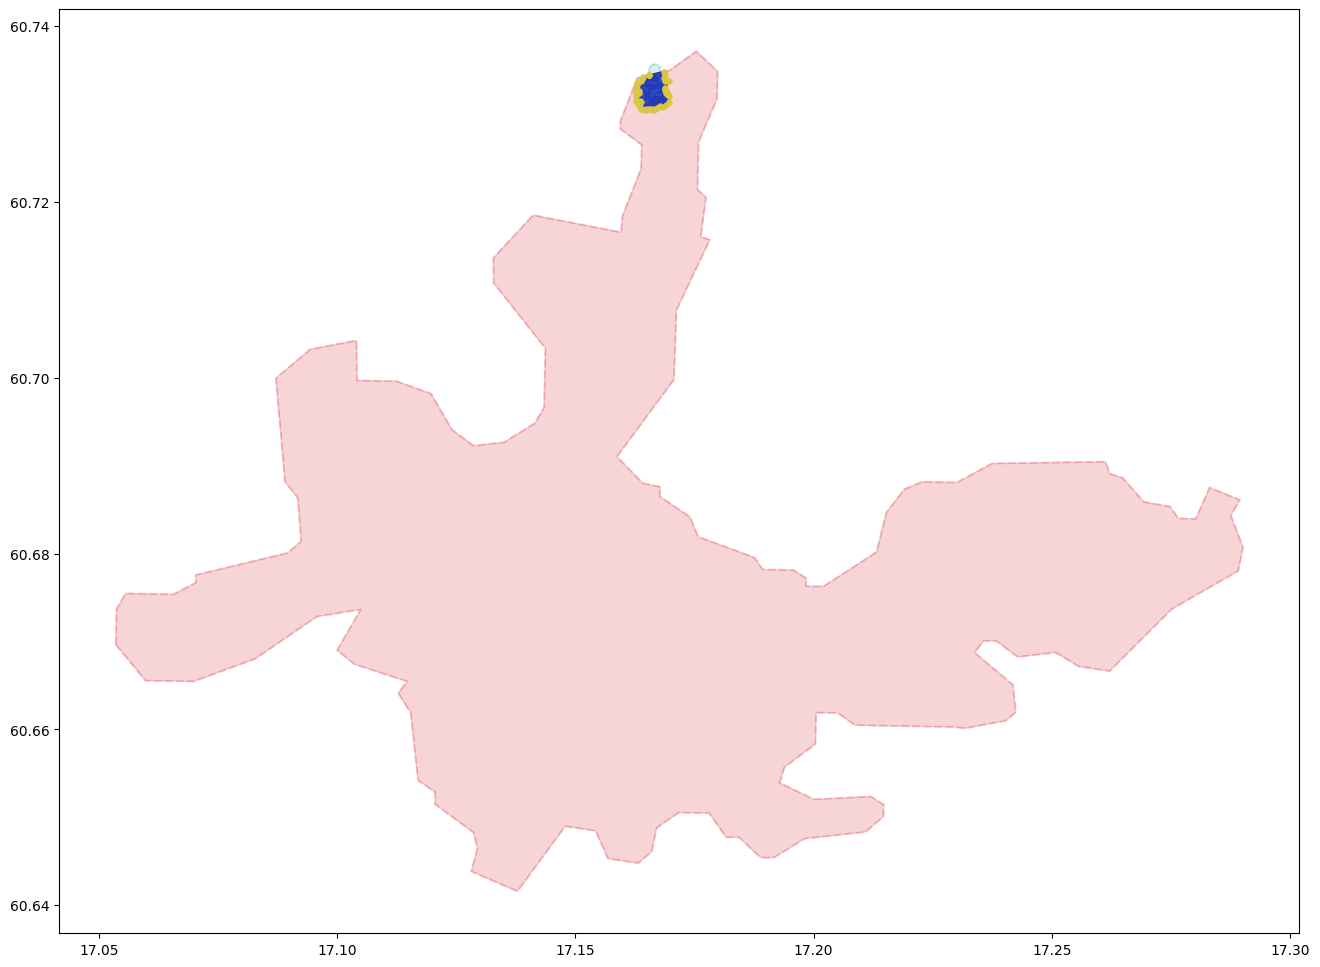

Passed 4696 of 4700. Total in set: 1818
Passed 4796 of 4800. Total in set: 1818
Passed 4896 of 4900. Total in set: 1818
Passed 4996 of 5000. Total in set: 1818
Passed 5096 of 5100. Total in set: 1818
Above FAILED!
Expected shape: POLYGON ((18.3446601 59.3060663, 18.3445662 59.3060608, 18.3443972 59.306143, 18.3443838 59.3062388, 18.3439933 59.3064598, 18.3439144 59.3064538, 18.3438447 59.3064935, 18.343753 59.3066219, 18.343724 59.3067166, 18.3437884 59.3067687, 18.3439305 59.3068837, 18.3440486 59.3069754, 18.3442819 59.3071315, 18.3445555 59.3072533, 18.3448608 59.307393, 18.3451781 59.3075026, 18.3455907 59.3075359, 18.3460911 59.3074408, 18.3461325 59.3074401, 18.3468858 59.3075244, 18.3476454 59.3078242, 18.3482896 59.3078601, 18.348423 59.307907, 18.3489779 59.3079188, 18.3498958 59.3079214, 18.3508211 59.3082158, 18.3506977 59.3083856, 18.3507911 59.3085934, 18.3503276 59.3088277, 18.3497161 59.3088976, 18.349134 59.3089961, 18.3489999 59.3090482, 18.3489677 59.3091111, 18.34841

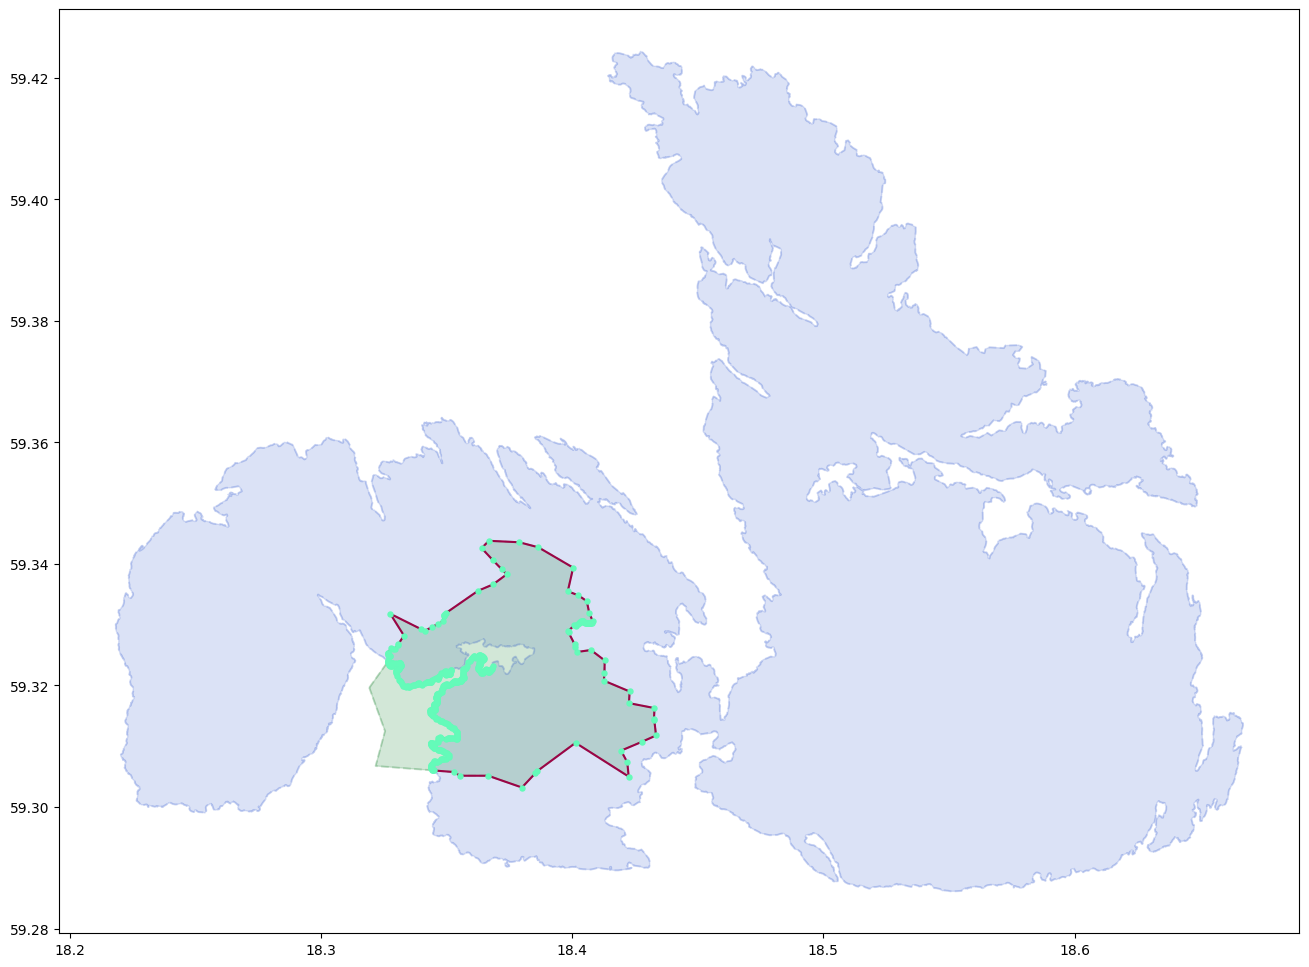

Passed 5195 of 5200. Total in set: 1818
Passed 5295 of 5300. Total in set: 1818
Above FAILED!
Expected shape: MULTIPOLYGON (((18.4158808 59.2542354, 18.415752 59.2542492, 18.4156394 59.254315, 18.4155267 59.2543506, 18.415634 59.2544164, 18.4155106 59.2544658, 18.4154195 59.2546852, 18.4152639 59.2548689, 18.4152156 59.2551048, 18.4150815 59.25522, 18.4147811 59.2552666, 18.4146309 59.2555134, 18.4142876 59.2557876, 18.4142865 59.2558919, 18.4144588 59.2560277, 18.4145129 59.2561441, 18.4144539 59.2562703, 18.4142232 59.2564622, 18.414132 59.2565911, 18.4142125 59.2567008, 18.4142768 59.2568078, 18.4141427 59.2568791, 18.4141964 59.2570354, 18.4135151 59.2575619, 18.4133595 59.2575975, 18.4131879 59.2575811, 18.4129626 59.257518, 18.4122223 59.2578333, 18.4117663 59.2579046, 18.4114069 59.2579896, 18.4098287 59.2585244, 18.409583 59.2586669, 18.4092611 59.2587355, 18.4085959 59.2592812, 18.4084216 59.2593497, 18.4084001 59.2593922, 18.4084162 59.2594279, 18.408435 59.2594786, 18.408410

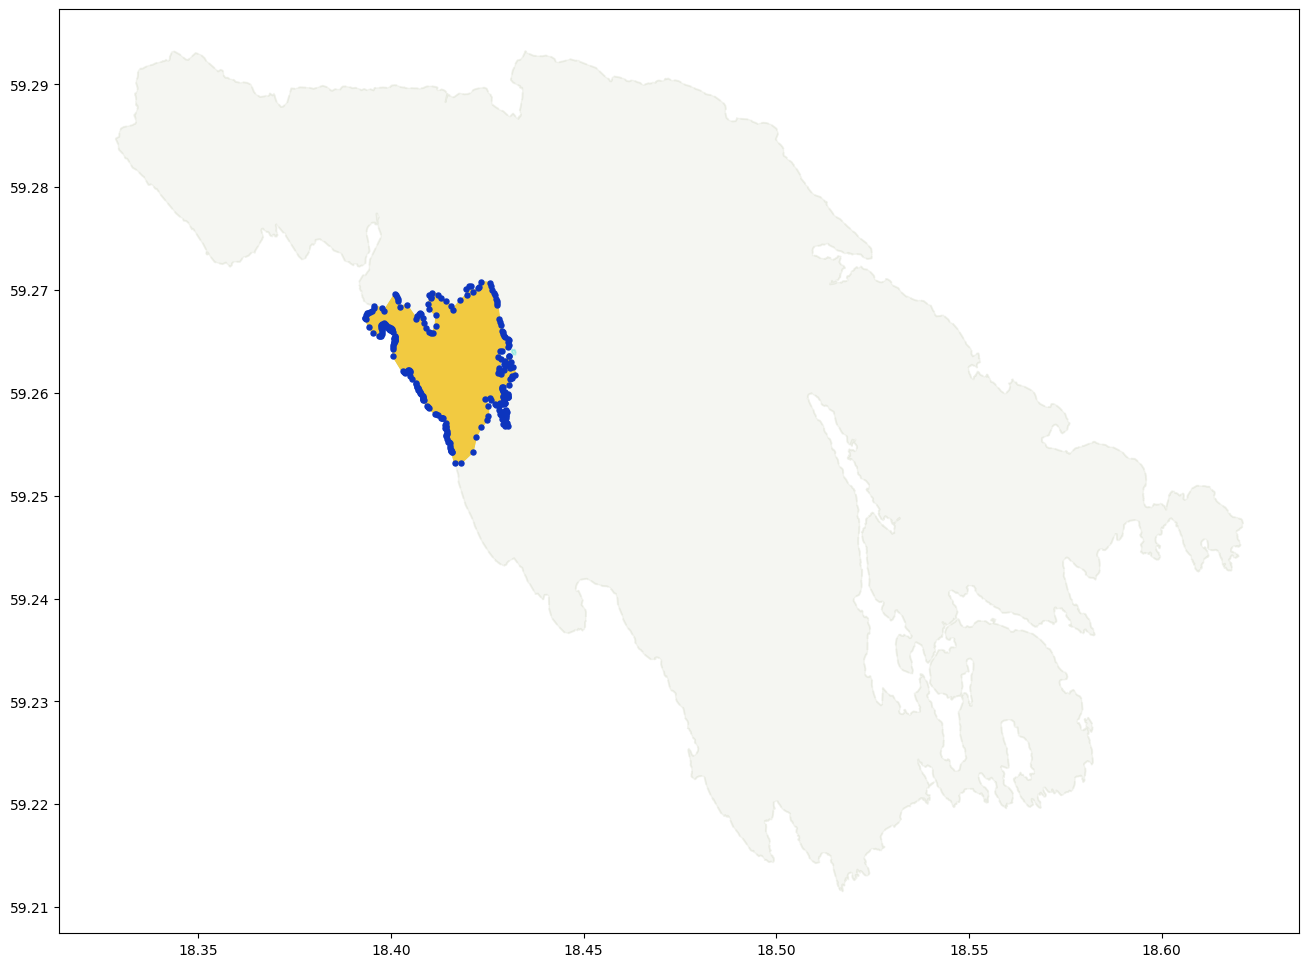

Passed 5394 of 5400. Total in set: 1818
Passed 5494 of 5500. Total in set: 1818
Passed 5594 of 5600. Total in set: 1818
Passed 5694 of 5700. Total in set: 1818
Passed 5794 of 5800. Total in set: 1818
Passed 5894 of 5900. Total in set: 1818
Passed 5994 of 6000. Total in set: 1818
Passed 6094 of 6100. Total in set: 1818
Passed 6194 of 6200. Total in set: 1818
Above FAILED!
Expected shape: POLYGON ((17.1627257 60.7329762, 17.1628574 60.7332995, 17.1629129 60.7334662, 17.1631543 60.7335984, 17.1636977 60.733737, 17.1639951 60.7339636, 17.164266986972173 60.734241902015796, 17.16547493699315 60.734393018340946, 17.1654864 60.7343885, 17.165491285723398 60.73439506359116, 17.168574545926386 60.73478078397964, 17.168748 60.734399, 17.1686256 60.734058, 17.1687015 60.7337169, 17.1691642 60.7337143, 17.1696514 60.7337387, 17.1688786 60.7329985, 17.1688623 60.7328693, 17.1688725 60.732763, 17.1689497 60.7326537, 17.1690941 60.7324748, 17.1691307 60.7324102, 17.1691185 60.7323665, 17.1691246 60.7

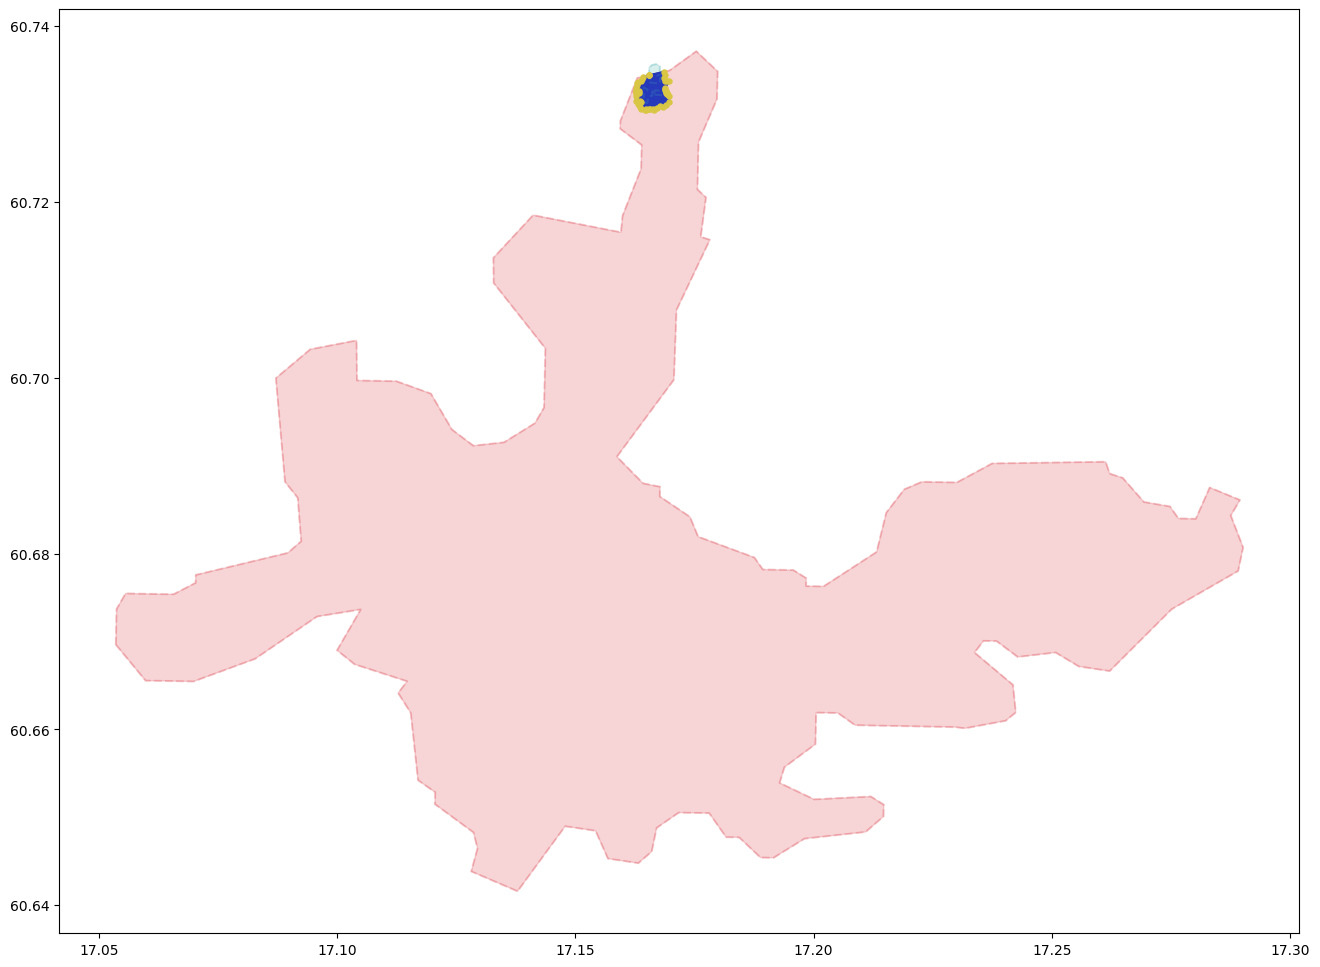

Passed 6293 of 6300. Total in set: 1818
Passed 6393 of 6400. Total in set: 1818
Above FAILED!
Expected shape: POLYGON ((18.326692 59.3242088, 18.3275557 59.3247995, 18.3274108 59.3248803, 18.327207 59.3249637, 18.3269495 59.3249966, 18.3267242 59.3250472, 18.3265847 59.3251129, 18.3265418 59.325273, 18.3266652 59.3253838, 18.3279204 59.326109, 18.328591 59.3259353, 18.3294225 59.325949, 18.3306713 59.3267189, 18.3307181 59.3267484, 18.3330435 59.3282152, 18.3275932 59.3318053, 18.3397485 59.329298, 18.3412832 59.3289814, 18.3443768 59.3296464, 18.3467027 59.3301464, 18.3486317 59.3305638, 18.3487954 59.3315152, 18.3488103 59.3316036, 18.3490071 59.331669, 18.3494927 59.3318373, 18.34996 59.3319827, 18.3625183 59.3355805, 18.3685321 59.3366384, 18.3739712 59.3383016, 18.3719621 59.3391269, 18.3684877 59.3406008, 18.3639577 59.3426116, 18.3668583 59.3438133, 18.3789672 59.3435715, 18.3865556 59.3427425, 18.400415 59.3393885, 18.398261 59.3355006, 18.4025099 59.3348353, 18.4058374 59.3338

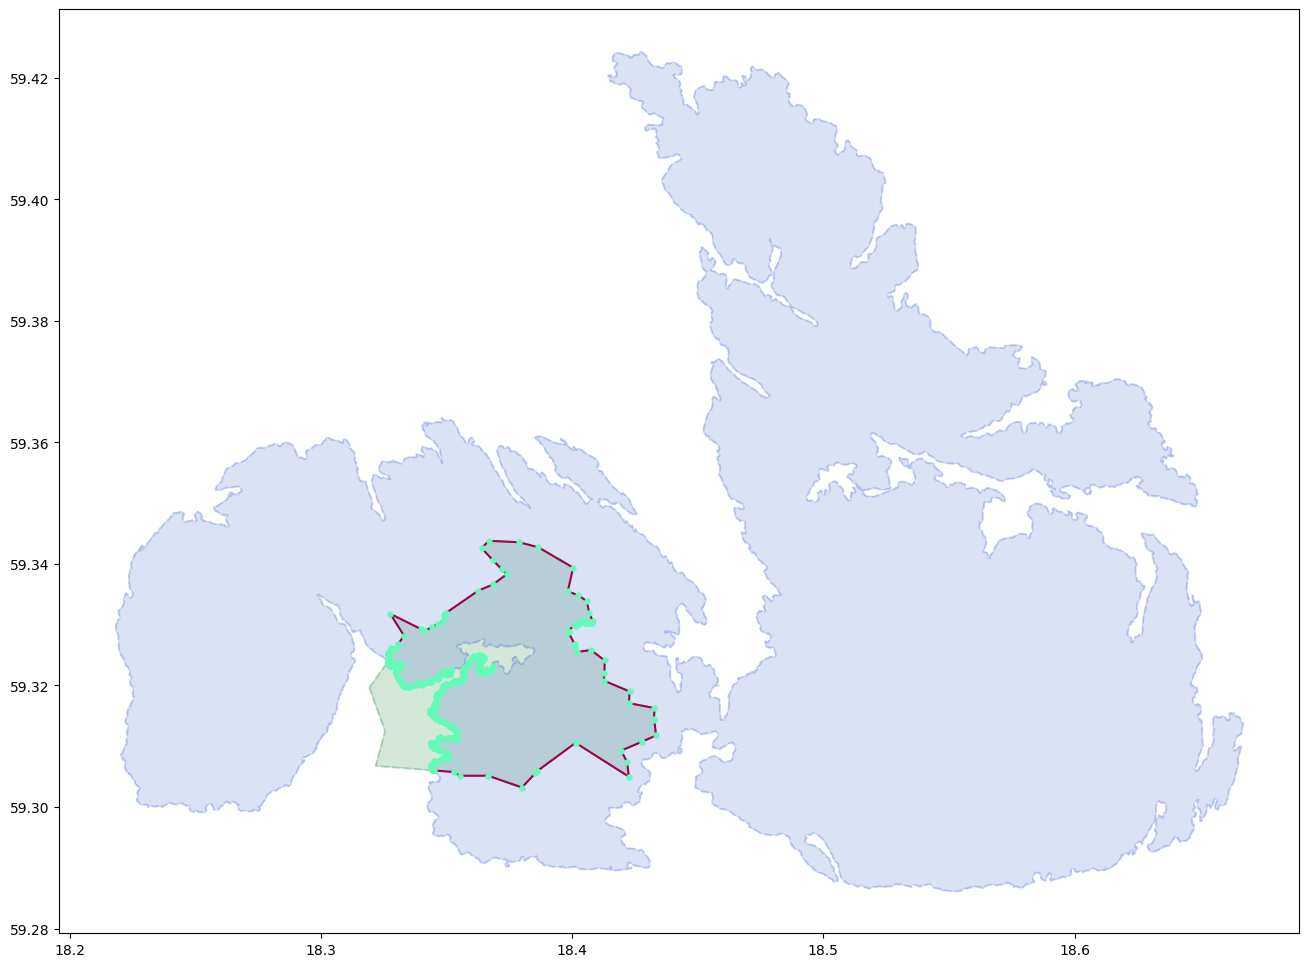

Above FAILED!
Expected shape: MULTIPOLYGON (((18.3934429 59.2675448, 18.3936587 59.2677924, 18.3939913 59.267765, 18.3944956 59.2678253, 18.3949784 59.2679788, 18.3955899 59.2682694, 18.3955792 59.2684229, 18.3976792 59.2682219, 18.39828 59.2679477, 18.401048 59.269587, 18.401316 59.269494, 18.4015843 59.2693186, 18.4017462 59.2691261, 18.4018982 59.2689006, 18.402238 59.26835, 18.4040378 59.2685502, 18.406493 59.267213, 18.4068001 59.267511, 18.4071541 59.2676371, 18.407464 59.2677503, 18.4079146 59.2676543, 18.408317 59.2672733, 18.4085154 59.2667798, 18.4092128 59.2663275, 18.409937 59.2658806, 18.4103876 59.2658203, 18.4108597 59.2658669, 18.411573 59.2664783, 18.4117704 59.2675376, 18.4099692 59.2681944, 18.4096247 59.2686862, 18.4104949 59.269269, 18.4103323 59.2693496, 18.4100002 59.2695141, 18.4107041 59.2697596, 18.4121408 59.2695653, 18.4128811 59.2692117, 18.4142973 59.2689047, 18.4155953 59.2684293, 18.4161928 59.268099, 18.418024 59.2690023, 18.4197689 59.2695394, 18.41950

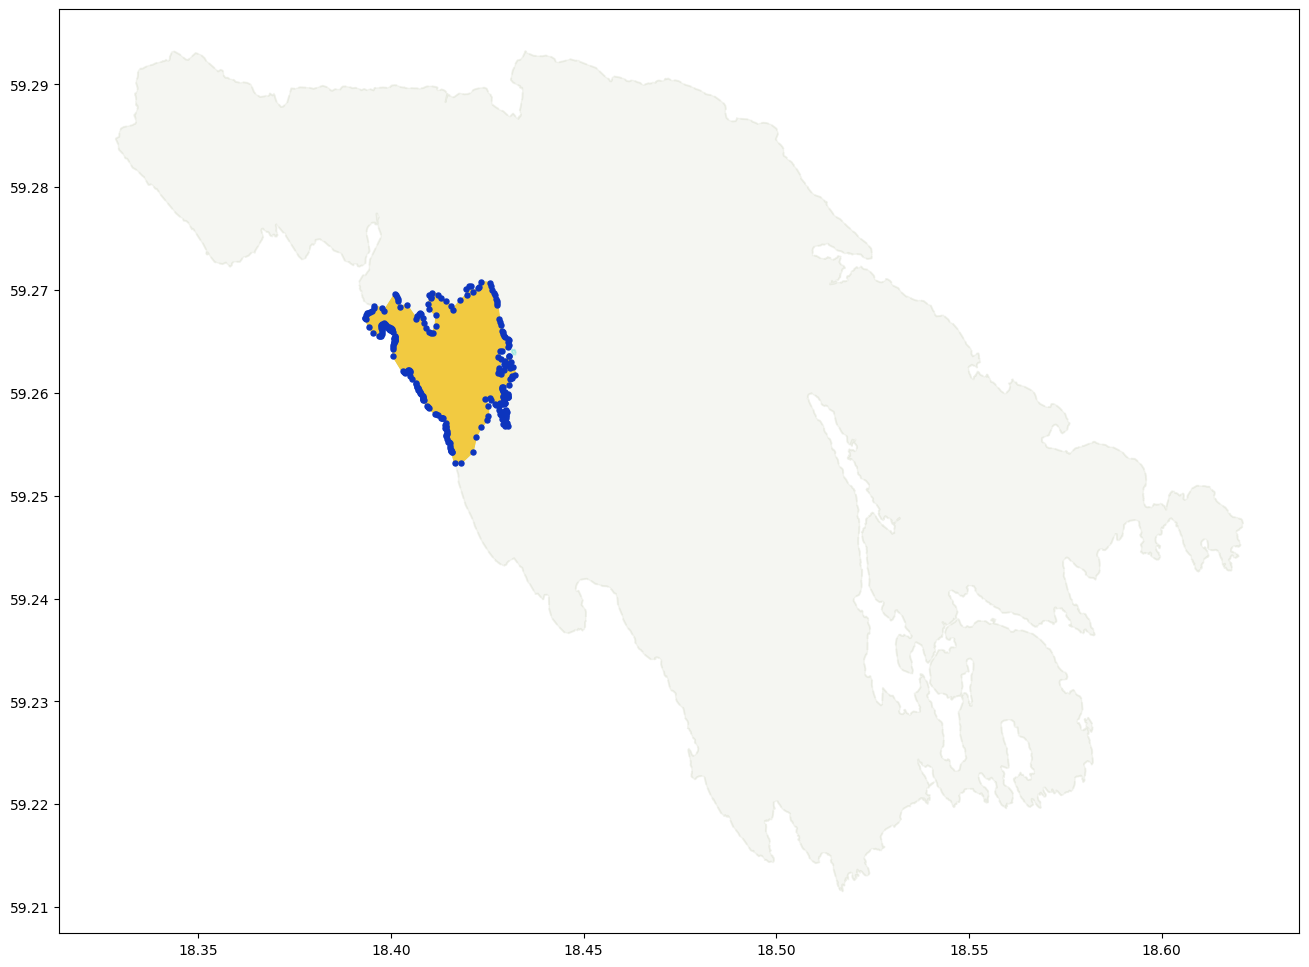

Passed 6491 of 6500. Total in set: 1818
Above FAILED!
Expected shape: POLYGON ((17.16547493699315 60.734393018340946, 17.1654864 60.7343885, 17.165491285723398 60.73439506359116, 17.168574545926386 60.73478078397964, 17.168748 60.734399, 17.1686256 60.734058, 17.1687015 60.7337169, 17.1691642 60.7337143, 17.1696514 60.7337387, 17.1688786 60.7329985, 17.1688623 60.7328693, 17.1688725 60.732763, 17.1689497 60.7326537, 17.1690941 60.7324748, 17.1691307 60.7324102, 17.1691185 60.7323665, 17.1691246 60.7323237, 17.1692282 60.732283, 17.1693238 60.732289, 17.1696492 60.7320544, 17.1695741 60.731341, 17.1690591 60.7310316, 17.1683618 60.7308375, 17.167718 60.7308637, 17.1670421 60.7306801, 17.1664735 60.7304598, 17.1663662 60.7305228, 17.1657547 60.7305123, 17.1655401 60.7306067, 17.1648642 60.73057, 17.1648212 60.7304651, 17.1645423 60.7304546, 17.1638262 60.730584, 17.1635864 60.7307796, 17.1632656 60.7310316, 17.1631451 60.7311759, 17.1637111 60.7313225, 17.1635494 60.7314742, 17.162713 60

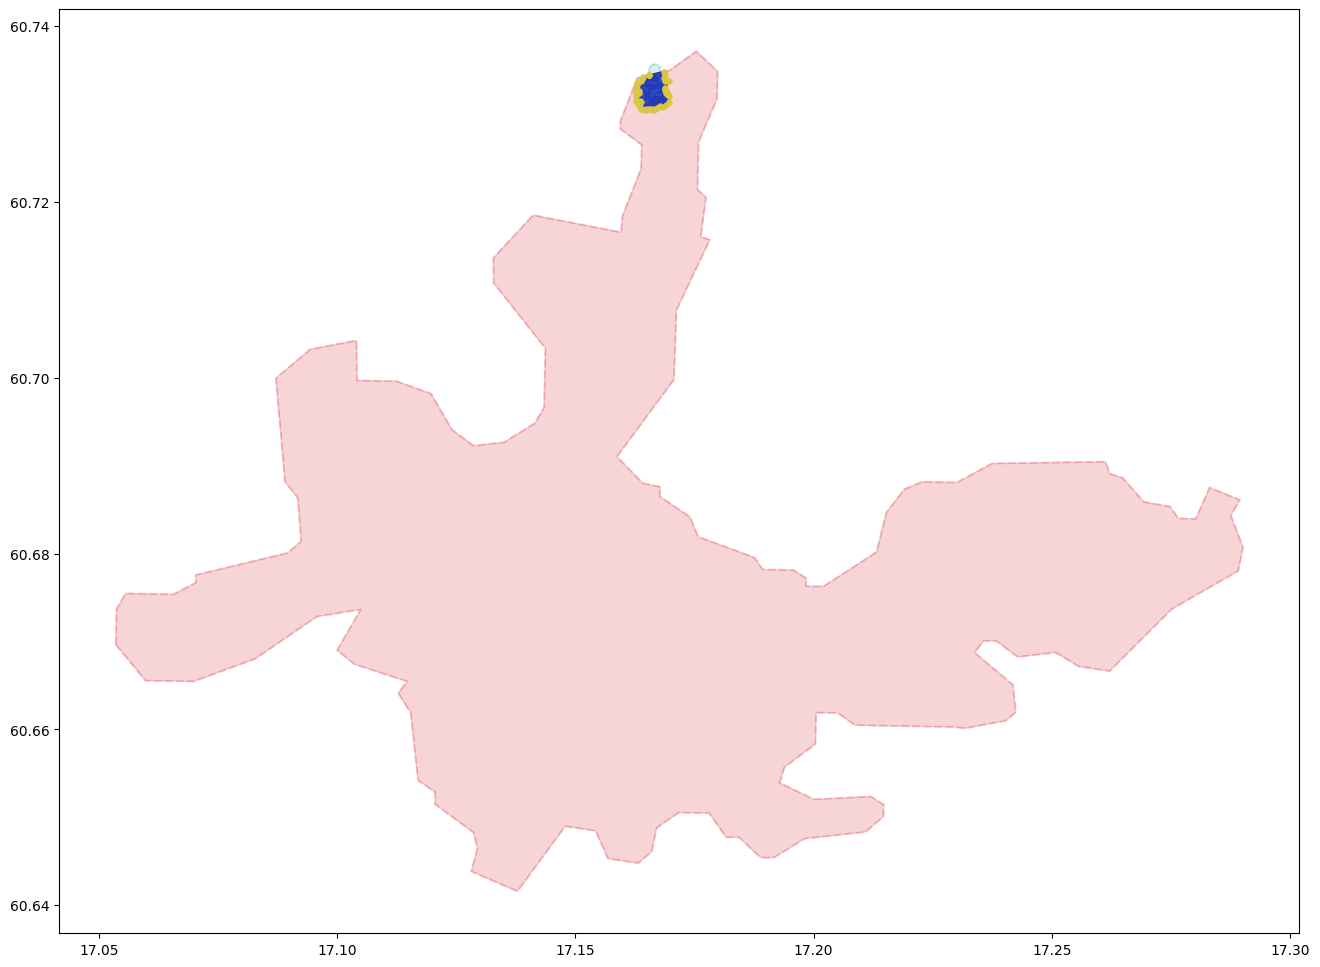

Passed 6590 of 6600. Total in set: 1818
Passed 6690 of 6700. Total in set: 1818
Passed 6790 of 6800. Total in set: 1818


In [6]:
total = 0
passed = 0
stats_df = pd.DataFrame(columns=['decomp', 'nbr_recieved_chks', 'nbr_total_chks', 'total_time', "dataset", "context", "predicate"])

def evaluate_dataset(data, plot, total, passed, dataset_name, delta_size=None, set_delta=False):
    for g1, g2 in data:
        if delta_size != None:
            set_max_num_delta(delta_size)
        #is_intersecting, intersect_points = binary_intersection(g1, g2)
        _, b1 = fpd.compress(g1)
        _, b2 = fpd.compress(g2)
        exp_boolean = shapely.intersects(g1, g2)
        #is_intersecting = chunk_bbox_is_intersecting((b1, b2), exp_boolean, True)
        stats_is_intersection, is_intersecting = chunk_bbox_is_intersecting((b1, b2), exp_boolean, True, get_stats=True)

        exp_shape = shapely.intersection(g1, g2)
        stats_intersection, intersection = chunk_bbox_intersection((b1, b2), exp_boolean, True, get_stats=True)
        if plot and exp_boolean: # Now only plotting intersecting shapes
            if False: # Plot chunks?
                plot_chunks_bounds(b1, True, avoid_show=True)
                plot_chunks_bounds(b2, True, avoid_create_frame=True, avoid_show=True)
            geoms = (g1, g2)
            for g in geoms:
                plot_geometry(g, SHOW_GEOMETRIES)
                plot_geometry_bbox(g, SHOW_BOUNDING_BOXES)
                plot_coordinates(g, SHOW_COORDINATES)
            
            plot_common_bbox(geoms, SHOW_COMMON_BOUNDING_BOX)
            #plot_intersecting_points(intersect_points, legends, SHOW_INTERSECTING_POINTS)

            if SHOW_COORDINATES or SHOW_GEOMETRIES or SHOW_INTERSECTING_POINTS or SHOW_COMMON_BOUNDING_BOX or SHOW_BOUNDING_BOXES:
                plt.title("Intersection Plot: " + ('True' if is_intersecting else 'False'))
                plt.show()


            PLOT_RESULTING_INTERSECTION = True
            if is_intersecting and PLOT_RESULTING_INTERSECTION:
                create_canvas(zoom=1.1, no_frame=True)
                for g in geoms:
                    plot_geometry(g, SHOW_GEOMETRIES, alpha=0.2, fill_alpha=0.2)
                    plot_coordinates(g, SHOW_COORDINATES, size=1)
                
                plot_geometry(intersection, fill_alpha=0.6, hatch=True)
                plot_coordinates(intersection, size=10)
                #plt.title("Intersecting Shape")
                plt.show()

        total += 1

        #Add statistics to stats_df
        if SHOW_STATS:
            for idx,stats in enumerate([stats_is_intersection, stats_intersection]):
                stats.append(dataset_name)
                s1, s2 = (shapely.get_num_coordinates(g1), shapely.get_num_coordinates(g2))
                sz = "MIXED"
                if s1 < LARGE_THRESHOLD and s2 < LARGE_THRESHOLD:
                    sz = "SMALL"
                elif s1 >= LARGE_THRESHOLD and s2 >= LARGE_THRESHOLD:
                    sz = "LARGE"
                
                stats.append(sz)
                stats.append(False if idx == 1 else True)
                if delta_size != None and set_delta:
                    stats.append(delta_size)
                stats_df.loc[len(stats_df)] = stats

        
        if is_intersecting == exp_boolean and exp_shape.equals(intersection):
            passed += 1
        #     if not exp_shape.is_empty:
        #         create_canvas()
        #         plot_geometry(g1,alpha=0.2)
        #         plot_geometry(g2,alpha=0.2)
        #         #plot_geometry(exp_shape, solid=False)
        #         plot_geometry(intersection)
        #         plot_coordinates(intersection)
        #         plt.show()
            
        else:

            print("Above FAILED!")
            print('Expected shape:', exp_shape)
            print('Returned shape:', intersection)
            create_canvas()
            plot_geometry(g1,alpha=0.2, fill_alpha=0.2, solid=False)
            plot_geometry(g2,alpha=0.2, fill_alpha=0.2, solid=False)
            #plot_geometry(exp_shape, solid=False)
            plot_geometry(intersection, fill_alpha=1.0)
            plot_coordinates(intersection)
            plt.show()
        if total % 100 == 0:
            print(f"Passed {passed} of {total}. Total in set: {len(data)}")
    return total, passed

#total, passed = evaluate_dataset(manual_data, False, total, passed, "Manual") # Second param: PLOT?

#total, passed = evaluate_dataset(special_cases, False, total, passed, "Special Case")
# total, passed = evaluate_dataset(world_data, False, total, passed, "World")
# total, passed = evaluate_dataset(lund_data, False, total, passed, "Lund")
total, passed = evaluate_dataset(waterways_data, False, total, passed, "Waterways")
total, passed = evaluate_dataset(sweden_data, False, total, passed, "Sweden")
total, passed = evaluate_dataset(new_york_data, False, total, passed, "NewYork")


print(f'Done. Passed: {passed} of {total}.')
#POLYGON ((6.5 6.5, 8 5, 4 4, 6.5 6.5))

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
import plotly.graph_objects as go
import plotly.express as px

if SHOW_STATS:
    for idx, df in enumerate([stats_df[stats_df['predicate'] == True], stats_df[stats_df['predicate'] == False]]): #Loop through predicate and not predicate intersection seperately
        #Calculate decompression and intersection time fraction
        df["decomp"] = df["decomp"].div(df.total_time/100, axis=0);
        df['intersection' if idx == 1 else 'is_intersection'] = df.apply(lambda x: 100 - x['decomp'], axis=1);
        exec_fractions_df = df[["decomp", 'intersection' if idx == 1 else 'is_intersection', "dataset", "context"]];
        exec_fractions_df = exec_fractions_df.groupby(['context','dataset']).mean();
        exec_fractions_df.reset_index(inplace=True)
       
        x = [
            exec_fractions_df.context.values,
            exec_fractions_df.dataset.values
        ]
        fig = go.Figure()
        fig.add_bar(y=x,x=exec_fractions_df.decomp.values, name="Decompression stage",orientation='h')
        if idx == 0:
            fig.add_bar(y=x,x=exec_fractions_df.is_intersection.values, name="IsIntersection", orientation='h')
            fig.update_layout(title="Execution time distrubution for IsIntersection",title_x=0.5)

        else:
            fig.add_bar(y=x,x=exec_fractions_df.intersection.values, name="Intersection", orientation='h')
            fig.update_layout(title="Execution time distrubution for Intersection",title_x=0.5)
        fig.update_layout(barmode="relative", xaxis_title="Execution time (%)", yaxis_title="Context (Geometry Size + Dataset)")
        fig.update_layout(legend=dict(yanchor="top",y=1.2, xanchor="right", x=0.997))
        fig.show()

In [ ]:
if SHOW_STATS:
    for idx, df in enumerate([stats_df[stats_df['predicate'] == True], stats_df[stats_df['predicate'] == False]]): #Loop through predicate and not predicate intersection seperately
        #Calculate franctions of mean fraction of chunks unfolded
        df["chk_fraction_unfolded"] = df["nbr_recieved_chks"].div(df.nbr_total_chks, axis=0) * 100;
        chk_fractions_df = df[["chk_fraction_unfolded", "dataset", "context"]];
        chk_fractions_df = chk_fractions_df.groupby(['context','dataset']).mean();
        chk_fractions_df.reset_index(inplace=True)
       
        x = [
            chk_fractions_df.context.values,
            chk_fractions_df.dataset.values
        ]
        fig = go.Figure()
        fig.add_bar(y=x,x=chk_fractions_df.chk_fraction_unfolded.values, name="Chunk fraction unfolded", orientation='h')
        
        if idx == 0:
            fig.update_layout(title="Fraction of chunks unfolded for IsIntersection",title_x=0.5)
        else:
            fig.update_layout(title="Fraction of chunks unfolded for Intersection",title_x=0.5)
        fig.update_layout(barmode="relative", xaxis_title="Chunks unfolded (%)", yaxis_title="Context (Geometry Size + Dataset)")

        fig.show()


In [ ]:
#Ongoing chunk analysis
if SHOW_STATS:
    d_cnt_size_df = pd.DataFrame(columns=['d_cnt_size', 'decomp', 'nbr_recieved_chks', 'nbr_total_chks', 'total_time', "dataset", "context", "predicate", "delta_size"])
    MAX_DELTA_SIZE = 100
    for max_delta_size in range(0,MAX_DELTA_SIZE):
        stats_df = pd.DataFrame(columns=['decomp', 'nbr_recieved_chks', 'nbr_total_chks', 'total_time', "dataset", "context", "predicate", "delta_size"])
        total, passed = evaluate_dataset(special_cases, False, total, passed, "Special Case", max_delta_size, set_delta=True)
        total, passed = evaluate_dataset(world_data, False, total, passed, "World", max_delta_size, set_delta=True)
        total, passed = evaluate_dataset(lund_data, False, total, passed, "Lund", max_delta_size, set_delta=True)
        d_cnt_size_df= pd.concat([d_cnt_size_df, stats_df])

    

In [ ]:
from plotly.subplots import make_subplots
if SHOW_STATS:
        for idx, df in enumerate([d_cnt_size_df[d_cnt_size_df['predicate'] == True], 
                                d_cnt_size_df[d_cnt_size_df['predicate'] == False]]): #Loop through predicate and not predicate intersection seperately
                df = df[['total_time', "context", "delta_size"]]
                df = df.groupby(["delta_size", "context"]).mean()
                df.reset_index(inplace=True)
                
                contexts = list(df.context.unique())
                context_idxs = {"LARGE": 1, "MIXED": 2, "SMALL": 3}

                fig = make_subplots(rows=1, cols=3, subplot_titles=(contexts), horizontal_spacing=0.1, x_title="MAX_CHUNK_SIZE", y_title="Mean Execution time (s)")

                for context in contexts:
                        curr_context_df = df[(df['context'] == context)]
                        fig.add_trace(go.Scatter(x=curr_context_df.delta_size.values, y=curr_context_df.total_time.values,
                                                mode='lines',
                                                name="{}".format(context)),row=1, col=context_idxs[context])
                
                if idx == 0:
                        fig.update_layout(title="Execution time for IsIntersection by MAX_CHUNK_SIZE",title_x=0.5)
                else:
                        fig.update_layout(title="Execution time for Intersection by MAX_CHUNK_SIZE",title_x=0.5)


                fig.show()

In [ ]:

# for idx, df in enumerate([d_cnt_size_df[d_cnt_size_df['predicate'] == True], 
#                           d_cnt_size_df[d_cnt_size_df['predicate'] == False]]): #Loop through predicate and not predicate intersection seperately
#     df = df[['total_time', "dataset", "context", "delta_size"]]
#     df = df.groupby(["delta_size", "context","dataset"]).mean()
#     df.reset_index(inplace=True)
#     fig = go.Figure()
#     max_value = df.total_time.max()
#     for context in df.context.unique():
#         for dataset in df.dataset.unique():
#             curr_context_df = df[(df['context'] == context) & (df['dataset'] == dataset)]

#             fig.add_trace(go.Scatter(x=curr_context_df.delta_size.values, y=curr_context_df.total_time.values,
#                                 mode='lines+markers',
#                                 name="{} {}".format(context, dataset)))
    
#     fig.update_yaxes(type="log") # log range: 10^0=1, 10^5=100000
#     if idx == 0:
#         fig.update_layout(title="Execution time for IsIntersection by MAX_CHUNK_SIZE")
#     else:
#         fig.update_layout(title="Execution time for Intersection by MAX_CHUNK_SIZE")
#     fig.update_layout(yaxis_title="Mean Execution time", xaxis_title="MAX_CHUNK_SIZE")


#     fig.show()